In [46]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# Load the CSV file into a DataFrame with appropriate encoding
file_path = 'DiwaliSalesData.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset to verify it's loaded correctly
# print(df.head())

In [48]:
# Remove columns with any null values
# df = df.drop()

# Display the cleaned DataFrame to ensure null columns are removed
print(df.head())


   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

              State      Zone       Occupation Product_Category  Orders  \
0       Maharashtra   Western       Healthcare             Auto       1   
1  Andhraï¿½Pradesh  Southern             Govt             Auto       3   
2     Uttar Pradesh   Central       Automobile             Auto       3   
3         Karnataka  Southern     Construction             Auto       2   
4           Gujarat   Western  Food Processing             Auto       2   

    Amount  
0  23952.0  
1  23934.0  
2  23924.0  
3  23912.0  
4  23877.0  


In [49]:
# Q-1

# Create a cross-tabulation between 'Gender' and 'Product_Category' and Auto  Hand & Power Tools are Product_Category values in csv
cross_tab = pd.crosstab(df['Gender'], df['Product_Category'])

# Display the cross-tabulation
print(cross_tab)


Product_Category  Auto  Hand & Power Tools
Gender                                    
F                   30                   0
M                   16                   3


In [50]:
# Q-3

# Count of 'Amount' for each 'Gender' and 'Product_Category'
count_amount = df.groupby(['Gender', 'Product_Category'])['Amount'].count()

# Display the result
print("Count of Amount:")
print(count_amount)

# Mean of 'Amount' for each 'Gender' and 'Product_Category'
mean_amount = df.groupby(['Gender', 'Product_Category'])['Amount'].mean()

# Display the result
print("\nMean of Amount:")
print(mean_amount)


# Sum of 'Amount' for each 'Gender' and 'Product_Category'
sum_amount = df.groupby(['Gender', 'Product_Category'])['Amount'].sum()

# Display the result
print("\nSum of Amount:")
print(sum_amount)


Count of Amount:
Gender  Product_Category  
F       Auto                  28
M       Auto                  15
        Hand & Power Tools     3
Name: Amount, dtype: int64

Mean of Amount:
Gender  Product_Category  
F       Auto                  23493.535357
M       Auto                  23535.600000
        Hand & Power Tools    23280.000000
Name: Amount, dtype: float64

Sum of Amount:
Gender  Product_Category  
F       Auto                  657818.99
M       Auto                  353034.00
        Hand & Power Tools     69840.00
Name: Amount, dtype: float64


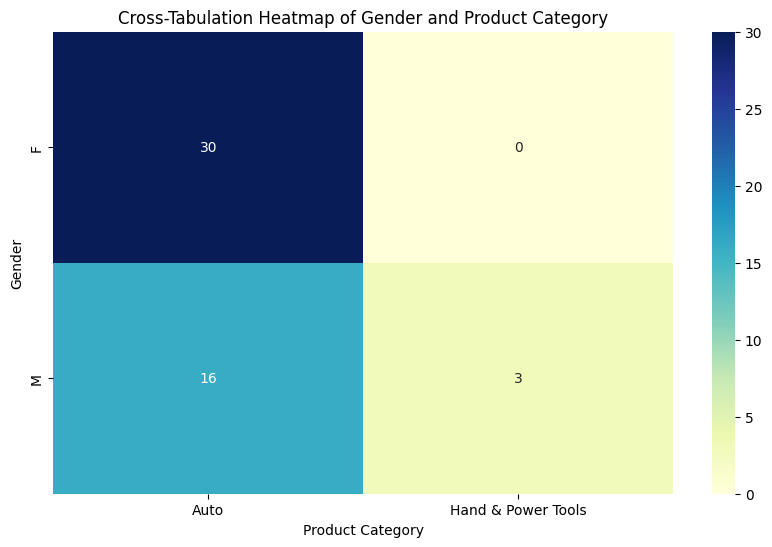

In [53]:

# Create a cross-tabulation between 'Gender' and 'Product_Category'
cross_tab = pd.crosstab(df['Gender'], df['Product_Category'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', cbar=True)

# Add titles and labels
plt.title('Cross-Tabulation Heatmap of Gender and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Gender')

# Show the plot
plt.show()

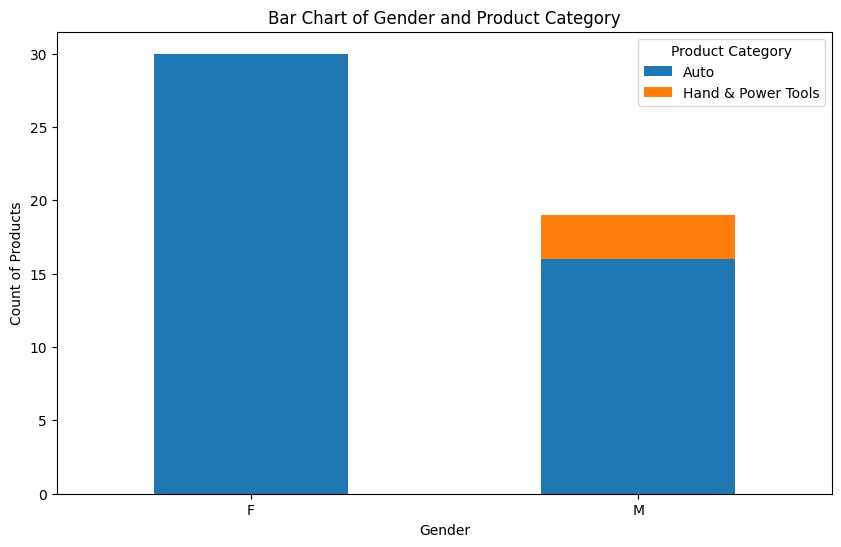

In [55]:
# Reset the index to get a tidy DataFrame for plotting
cross_tab_reset = cross_tab.reset_index()

# Plot a bar chart
cross_tab_reset.plot(x='Gender', kind='bar', stacked=True, figsize=(10, 6))

# Add titles and labels
plt.title('Bar Chart of Gender and Product Category')
plt.xlabel('Gender')
plt.ylabel('Count of Products')
plt.legend(title='Product Category')
plt.xticks(rotation=0)

# Show the plot
plt.show()


Missing Data in Each Column:
Amount    3
dtype: int64


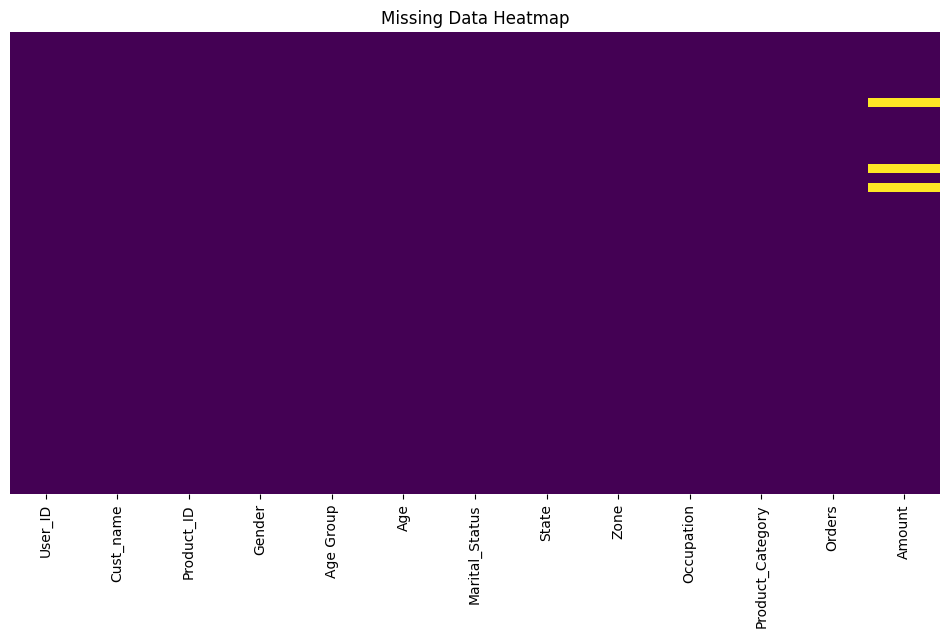

In [58]:
# Check for missing data in the dataset
missing_data = df.isnull().sum()

# Display the missing data counts
print("Missing Data in Each Column:")
print(missing_data[missing_data > 0])  # Display only columns with missing data


# Visualize missing data

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()


In [63]:
# Impute missing values based on the nature of the data

# For categorical columns, fill missing values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# For numerical columns, fill missing values with the mean or median
numerical_cols = df.select_dtypes(exclude=['object']).columns
for col in numerical_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

# Display the DataFrame after imputation
print("\nDataFrame after Imputation:")
print(df.head())



DataFrame after Imputation:
   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

              State      Zone       Occupation Product_Category  Orders  \
0       Maharashtra   Western       Healthcare             Auto       1   
1  Andhraï¿½Pradesh  Southern             Govt             Auto       3   
2     Uttar Pradesh   Central       Automobile             Auto       3   
3         Karnataka  Southern     Construction             Auto       2   
4           Gujarat   Western  Food Processing             Auto       2   

    Amount  
0  23952.0  
1  23934.0  
2  23924.0  
3  23912.0  
4  23877.0

C:\Users\hp\AppData\Local\Temp\ipykernel_2772\2939309623.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_2772\2939309623.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

In [64]:
# Re-check for missing data after imputation
missing_data_after = df.isnull().sum()
print("\nMissing Data After Imputation:")
print(missing_data_after[missing_data_after > 0])  # Display any remaining missing data



Missing Data After Imputation:
Series([], dtype: int64)
